In [4]:
import matplotlib.pyplot as plt
import pickle
from WeightsModification import *
import os
import numpy as np



In [3]:
with open("../save/objects/trial_1/baseline_fmnist_1.0_COMMS25_LOCAL10_BS64_USERS6_IID4.pkl", "rb") as f1:
     res_1 = pickle.load(f1)
     
    
with open("../save/objects/trial_1/alpha_0.5_fmnist_1.0_COMMS25_LOCAL10_BS64_USERS6_IID4.pkl", "rb") as f2:
     res_2 = pickle.load(f2) 



In [4]:
a = res_1.global_loss_manager.validation_total_across_communication
b = res_2.global_loss_manager.validation_total_across_communication
print(a)
print(b)


[647.7538433685303, 588.0177845428467, 557.763071472168, 548.5487558959961, 546.7109778518677, 546.4750594284058, 544.3027565505981, 543.031993244934, 541.6754271652221, 540.5957843215942, 539.5376162078858, 538.237360192871, 537.9430004974365, 537.4997044662475, 538.1949752487183, 537.0176160705566, 534.8254514205933, 534.9839460647584, 533.6687880813598, 534.048092527771, 533.1518093551636, 532.6515810211182, 533.1763650283814, 532.4160365692138, 531.6965538024903]
[637.0993318084717, 541.8216960235595, 534.5469332244874, 529.6804437438965, 526.2709664611816, 525.4113889831543, 522.1137275878906, 522.885076184082, 520.9056064208985, 519.4898417037964, 519.0425344177246, 518.7158030166626, 518.0322460739136, 518.2689670898437, 517.6876990570069, 516.4701913162231, 519.8970558364869, 517.7304878723145, 518.4528623062134, 518.3552205337525, 519.408006098938, 517.2346418121338, 516.3400098693847, 516.6836189285278, 516.0403016265869]


In [52]:
def plot_all_summarised(dataset, is_niid_1, is_beta):
     baseline_one = f"baseline_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     alpha_pointone = f"alpha_0.1_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     alpha_pointfive = f"alpha_0.5_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     alpha_pointnine = f"alpha_0.9_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     
     uri = "../save/objects"
     trials = ["trial_1","trial_2","trial_3"]
     individual_files = [baseline_one, alpha_pointone, alpha_pointfive, alpha_pointnine]
     x_vals = list(range(1, 26))
     means_and_stdevs = []
     labels = []
     for setting in individual_files:
        all_data = []
        for trial in trials:
            whole_file_name = f"{uri}/{trial}/{setting}"
            if os.path.exists(whole_file_name):
                with open(whole_file_name, "rb") as f:
                    res = pickle.load(f)
                all_data.append(res.global_loss_manager.validation_total_across_communication)
        if len(all_data) != 0:
            
            all_data = np.array(all_data)
            means = np.mean(all_data, axis=0)
            stdevs = np.std(all_data, axis=0)
            means_and_stdevs.append((means, stdevs))
            relevant_label = ""
            if setting.split("_")[0] == "baseline":
                relevant_label = "baseline"
            else:  
                relevant_label = setting.split("_")[1]
            labels.append(relevant_label)
     
     
     plt.xlabel("Communication Rounds")
     plt.ylabel("VAE Test Loss")
     plt.title(f"Test loss differences over 25 communication rounds between a β-VAE with β={"10.0" if is_beta else "1.0"} \n and modified weights over different values of α under a {"NIID-1" if is_niid_1 else "NIID_2"} setting")
     for idx, label in enumerate(labels):
         graph_label = "α_" + label if label != "baseline" else label
         markers, caps, bars = plt.errorbar(x_vals, means_and_stdevs[idx][0],yerr=means_and_stdevs[idx][1],label=graph_label)
         [bar.set_alpha(0.45) for bar in bars]
     plt.grid()
     plt.legend()
     plt.show()
        

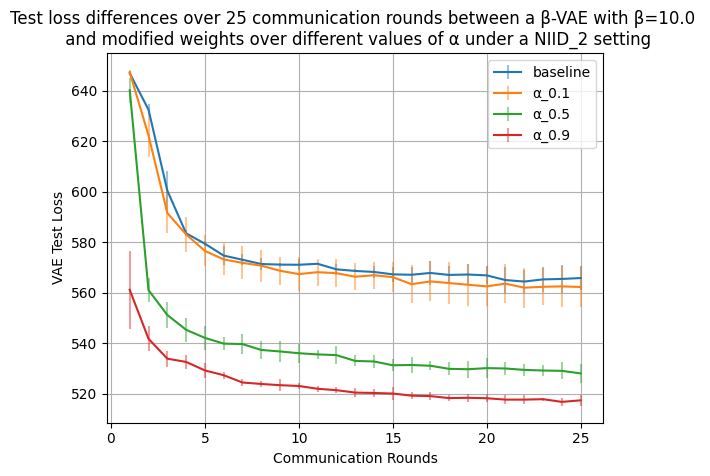

In [55]:
plot_all_summarised("fmnist",is_niid_1=False,is_beta=True)

In [26]:
cur_alpha = "1.0"
cur_beta = "0.5"


x_vals = list(range(len(a)))
plt.plot(x_vals, a,label="Baseline")
plt.plot(x_vals, b,label="Modified Weights")
plt.xlabel("Communication Rounds")
plt.ylabel("VAE Test Loss")
plt.title("Differences between test losses over 25 communication rounds between \n the baseline β-VAE and the modified weights with alpha=1.0 and β=1.0  ")
plt.grid()
plt.legend()
plt.show()


NameError: name 'a' is not defined